**Customer Churn Prediction Step by Step**

Before we begin, let's understand the basic terms. 

**Customer Churn ** : When the customer is likely to leave you ! 

Having a churn rate prediction can help you maintain your customers and improvise on your product and services. 
Such analysis can benefit a business/organisation incredibly .   

In [1]:
# Step 1 : Importing libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  #data visualization 
%matplotlib inline 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

UsageError: Line magic function `%matplolib` not found.


In [2]:
# Step 2 : Load Dataset 
customer_data = pd.read_csv('../input/bank-customer-churn-modeling/Churn_Modelling.csv')

In [3]:
#Have a look at the dataset 
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Let's understand data in more objective way ! 

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#Summary of data 
customer_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
customer_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
#Let's convert these columns into a list 
columns = customer_data.columns.values.tolist()
print(columns)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


#Step 3 : Feature Selection 

As you may see different features above, I will just make it easy for you to understand what each column indicates. 
* RowNumber - It mainly works as an index . 
* CustomerID- It is a unique id to refer to the customer 
* Surname - As the name indicates, surname of the customer
* CreditScore - This can affect the customer churn rate. Customer with higher score will not leave while that with lowest is more likely to leave 
* Geography - Customer's location 
* Gender - Male/Female 
* Age 
* Tenure - No. of years a customer has been our client 
* Balance - People with high balance are less likely to leave 
* NumofProducts - Number of products a customer has bought through the bank 
* HasCrCard - Determine if the customer has a credit card
* IsActiveMember - Is the customer an active member 
* EstimatedSalary - People with less salary are more likely to leave the bank 
* Exited - Our target. Whether the customer will leave or not 

Hereby , we understand that RowNumber, CustomerId and Surname are not so important. Hence, we may remove these columns. 

In [8]:
df = customer_data.drop(['RowNumber','CustomerId','Surname'] , axis = 1)

In [9]:
#Step 4 : Convert Categorical Features to numerical 

df = df.drop(['Geography', 'Gender'] , axis=1)

In [10]:
#One-hot encoding of categorical variables 

geography = pd.get_dummies(customer_data.Geography).iloc[:,1:]
gender= pd.get_dummies(customer_data.Gender).iloc[:,1:]

In [11]:
#Now add these numerical data to your dataset 

df=pd.concat([df,geography,gender], axis=1 )

In [12]:
#Step 5: Preprocessing 

X=df.drop(['Exited'],axis=1)
y=df['Exited']

In [13]:
#Partitioning data for training and testing 

from sklearn.model_selection import train_test_split 

X_train,X_test, y_train , y_test = train_test_split(X,y,test_size=0.2, random_state = 0 )

Here, the data will be split such that training data will have 80% and rest 20% in test. 

Step 6 : Application of Machine Learning Algorithm 

Here, we will apply Random Forest Algorithm as it is simple to understand and one of the most powerful classification algorithm. 


In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200 , random_state = 0) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

Step 7 : Algorithm Evaluation 
We did train the model according to our data. But it is important to understand how much did the algorithm learn and evaluate its performance. 


In [15]:
from sklearn.metrics import classification_report, accuracy_score 
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

0.8635


As the results indicate the accuracy score is 86% whereby our predictions will be 86% true. 

Step 7: Feature Evaluation 
This is the final part of our project . 
Here we try to understand which feature played a major role in our predictions. 

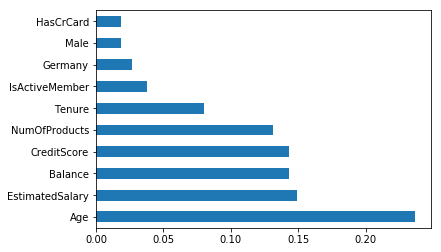

In [16]:
importance_score = pd.Series(classifier.feature_importances_ ,index = X.columns )
importance_score.nlargest(10).plot(kind='barh')

Thus, this provides a crucial benefit to the business understanding and long term benefit. 